In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


In [4]:
dftype=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')
dftype

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


As we can observe that there is no heading is there in the dataset , now we must add  the heading with thers respective columns.

In [32]:
names = ['ID','RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
dftypeg=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv',names=names)
dftypeg

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [33]:
dftypeg.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [34]:
dftypeg.tail()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


Exploratory Data Analysis

In [35]:
# checkin the dimension of the dataset
dftypeg.shape

(214, 11)

In [36]:
dftypeg.columns

Index(['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

As we can see the Columns are 11 and 214 rows

In [37]:
dftypeg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [38]:
# checking the null values
dftypeg.isnull().sum()


ID      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [39]:
dftypeg.isnull().sum().sum()

0

As we can observe there is no null values in the dataset

In [40]:
#lets check the number of unique value in each column
dftypeg.nunique().to_frame()

,0
ID,214
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32


In [41]:
#here we are dropping the ID column as its seems of no use in the analysis
dftypeg.drop('ID', axis=1, inplace=True)

In [42]:
#summary statistics of data
dftypeg.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


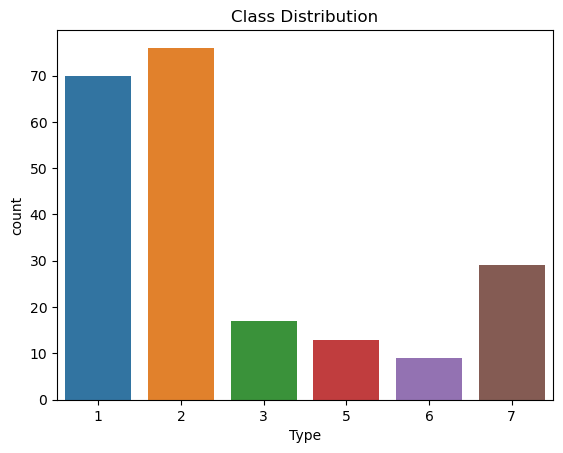

In [43]:
# Visualize class distribution
sns.countplot(x='Type', data=dftypeg)
plt.title('Class Distribution')
plt.show()


type 1 and 2 are maximum in the dataset

In the dataset glass type is our target column and for prediction of type of glass we need to find the relation between elements that made the glass type by visualizaion

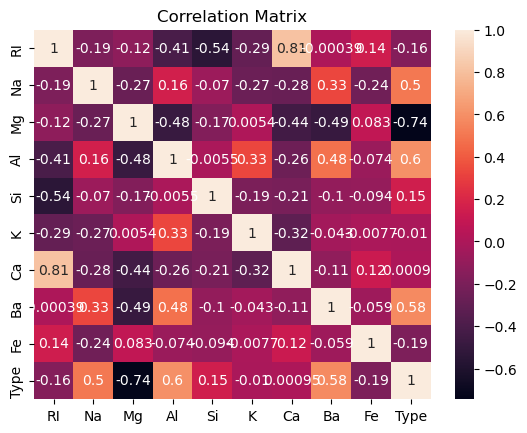

In [44]:
# Correlation matrix
correlation_matrix = dftypeg.corr()

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In this dataset calcium quantity is high

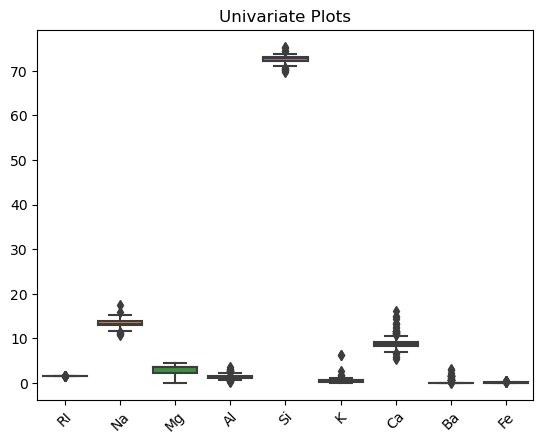

In [45]:
# Univariate Plots
sns.boxplot(data=dftypeg.drop('Type', axis=1))
plt.title('Univariate Plots')
plt.xticks(rotation=45)
plt.show()


Here in univariate silicon is at quantity is high in every glass

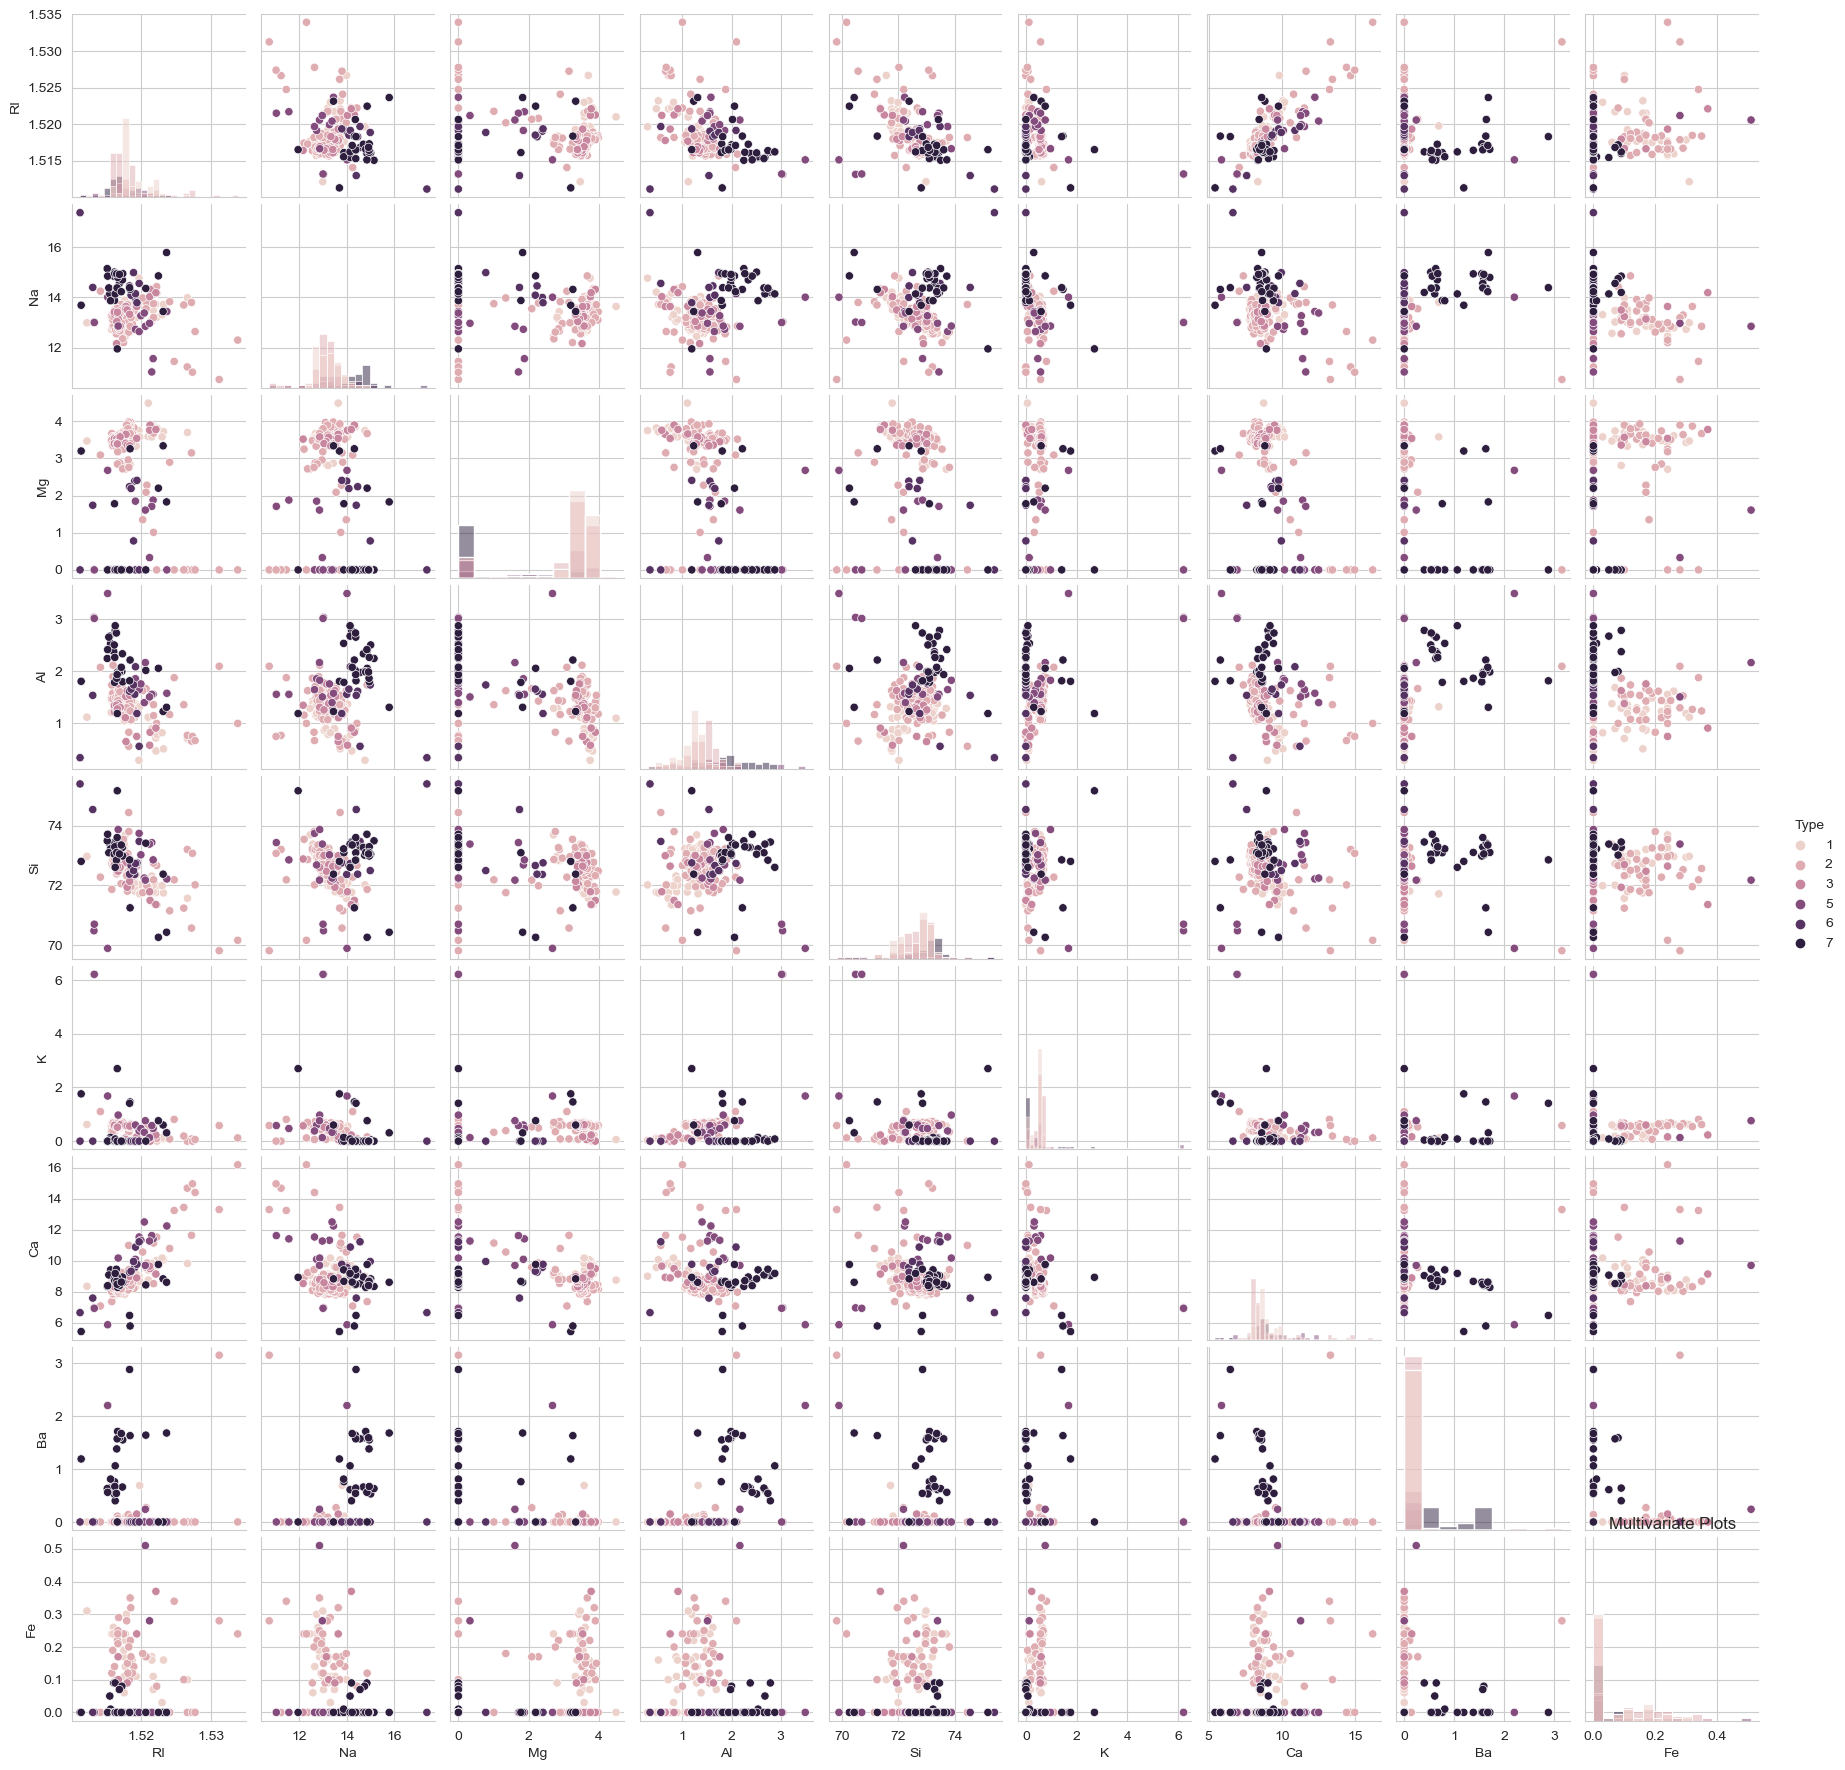

In [46]:
# Multivariate Plots
sns.set_style('whitegrid')
sns.pairplot(data=dftypeg, hue='Type',diag_kind = 'hist',height=2)
plt.title('Multivariate Plots')
plt.show()

Above is the paiplot and we taken hue as type of glass and here we observed that in manganese graph we see that type 1 is highest.

In [47]:
#checking the outliers

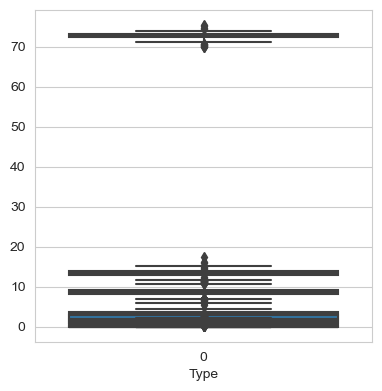

In [48]:
plt.figure(figsize=(20,25))
p=1
for i in dftypeg:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(dftypeg[i])
        plt.xlabel(i)

here we can see some outliers in the dataset 

Calculting the outliers if any by z-scores

In [49]:
# Calculate the Z-Scores for each numerical attribute
z_scores=np.abs(stats.zscore(dftypeg.drop('Type', axis=1)))

# Set a threshold for considering data points as outliers 
threshold=3

# Identify outliers using the threshold
outliers=(z_scores > threshold).any(axis=1)

# Filter the dataset to remove rows with outliers
dftype1=dftypeg[~outliers]
dftype1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


Here we observed that some of the outliers are removed from the dataset and now we will train this model by splitting it up

In [50]:

# Splitting the dataset into train and test sets

X = dftype1.drop('Type', axis=1)
y = dftype1['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We splitted the dataset in 80:20 as 80 triaing model and 20 test data

We will try different methods to train  the model like kneighbor,Decision Tree, Logical Regression and Support Vector Machines to test the accuracy of the model and predict the values 

In [51]:

# Initialize and train models
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

lr = LogisticRegression()
lr.fit(X_train, y_train)

svm = SVC()
svm.fit(X_train, y_train)

# Evaluate models and choose the best one
from sklearn.metrics import accuracy_score, classification_report
models = [knn, dt, lr, svm]
model_names = ['K-Nearest Neighbors', 'Decision Tree', 'Logistic Regression', 'SVM']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}\n")


Model: K-Nearest Neighbors
Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.85      0.69        13
           2       0.77      0.67      0.71        15
           3       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         2
           6       1.00      0.33      0.50         3
           7       0.67      0.67      0.67         3

    accuracy                           0.67        39
   macro avg       0.67      0.59      0.59        39
weighted avg       0.67      0.67      0.64        39


Model: Decision Tree
Accuracy: 0.5897435897435898
Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.77      0.61        13
           2       0.89      0.53      0.67        15
           3       0.00      0.00      0.00         3
           5       0.50      1.00      0.67         2
           6       1.00      0.33

In result we observed that logical Regression has maximum accuracy as compared to other models and we can try hyperparameter tuning for better results for the model

In [55]:
# to predict the glass type taking some random values 

# Create a new instance with the random data
test_data= np.array([[1.3255,12.27,3.00,1.20,77.08,0.45,6.07,0.00,0.00]])

for model, name in zip(models, model_names):
    y_pred = model.predict(test_data)

In [56]:
y_pred

array([1], dtype=int64)

after the prediction the glass type is one